In [26]:

import re
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

filename = 'sumedh_garage.sub'
filename = 'repeat.sub'

data = []
with open(filename, 'r') as f:
    for line in f:
        m = re.match(r'RAW_Data:\s*([-0-9 ]+)\s*$', line)

        if m:
            data.extend([ int(seg) for seg in m[1].split(r' ') if seg != ''])

accumulated_time = 0
absolute_times = [0]
bit_values = [1]

for time_interval in data:
    absolute_times.append(accumulated_time)
    # absolute_times.append(accumulated_time)
    accumulated_time += abs(time_interval)

    if time_interval > 0:
        bit_values.append(1)
        # bit_values.append(0)
    else:
        bit_values.append(0)
        # bit_values.append(1)

# convert to ms
absolute_times = [x / 1000 for x in absolute_times]

# big wave (sumedh)
start_index = 3724
end_index = 6645

# absolute_times = absolute_times[start_index:end_index]
# data = data[start_index:end_index+1]
# bit_values = bit_values[start_index:end_index]
# absolute_times = [x - absolute_times[0] for x in absolute_times]


In [27]:
# export data to .h file
with open('sumedh_garage.h', 'w') as f:
    f.write('#include <stdint.h>\n')
    f.write('#define NUM_SAMPLES %d\n' % len(data))
    f.write('const PROGMEM int32_t signal[NUM_SAMPLES] = {')
    f.write(', '.join([str(int(x)) for x in data]))
    f.write('};\n')

In [31]:
pos = [abs(x) for x in data]
print(len(pos))
print(sum(pos))
print(max(pos))

757
2401250
167990


In [28]:
# print large gaps in absolute time
threshold = 10
for i in range(1, len(absolute_times)):
    if absolute_times[i] - absolute_times[i-1] > threshold:
        print(f'Large gap between times {absolute_times[i-1]} and {absolute_times[i]}, indices {i-1} to {i}, t = {absolute_times[i] - absolute_times[i-1]}')

Large gap between times 28.026 and 109.105, indices 31 to 32, t = 81.07900000000001
Large gap between times 133.398 and 240.791, indices 119 to 120, t = 107.393
Large gap between times 248.623 and 263.738, indices 121 to 122, t = 15.115000000000009
Large gap between times 265.491 and 280.616, indices 129 to 130, t = 15.125
Large gap between times 282.489 and 296.266, indices 141 to 142, t = 13.777000000000044
Large gap between times 299.307 and 313.38, indices 149 to 150, t = 14.072999999999979
Large gap between times 316.546 and 329.891, indices 155 to 156, t = 13.345000000000027
Large gap between times 332.703 and 346.126, indices 157 to 158, t = 13.423000000000002
Large gap between times 350.294 and 362.401, indices 163 to 164, t = 12.107000000000028
Large gap between times 367.085 and 378.462, indices 169 to 170, t = 11.37700000000001
Large gap between times 384.01 and 395.129, indices 175 to 176, t = 11.119000000000028
Large gap between times 395.942 and 406.831, indices 179 to 18

In [30]:
# # small wave
# start_index_1 = 2682
# end_index_1 = 2731
# start_index_2 = 2730
# end_index_2 = 2779
# start_index_3 = 2778
# end_index_3 = 2827

# absolute_times_1 = absolute_times[start_index_1:end_index_1]
# bit_values_1 = bit_values[start_index_1:end_index_1]
# absolute_times_1 = [x - absolute_times_1[0] for x in absolute_times_1]

# absolute_times_2 = absolute_times[start_index_2:end_index_2]
# bit_values_2 = bit_values[start_index_2:end_index_2]
# absolute_times_2 = [x - absolute_times_2[0] for x in absolute_times_2]

# absolute_times_3 = absolute_times[start_index_3:end_index_3]
# bit_values_3 = bit_values[start_index_3:end_index_3]
# absolute_times_3 = [x - absolute_times_3[0] for x in absolute_times_3]

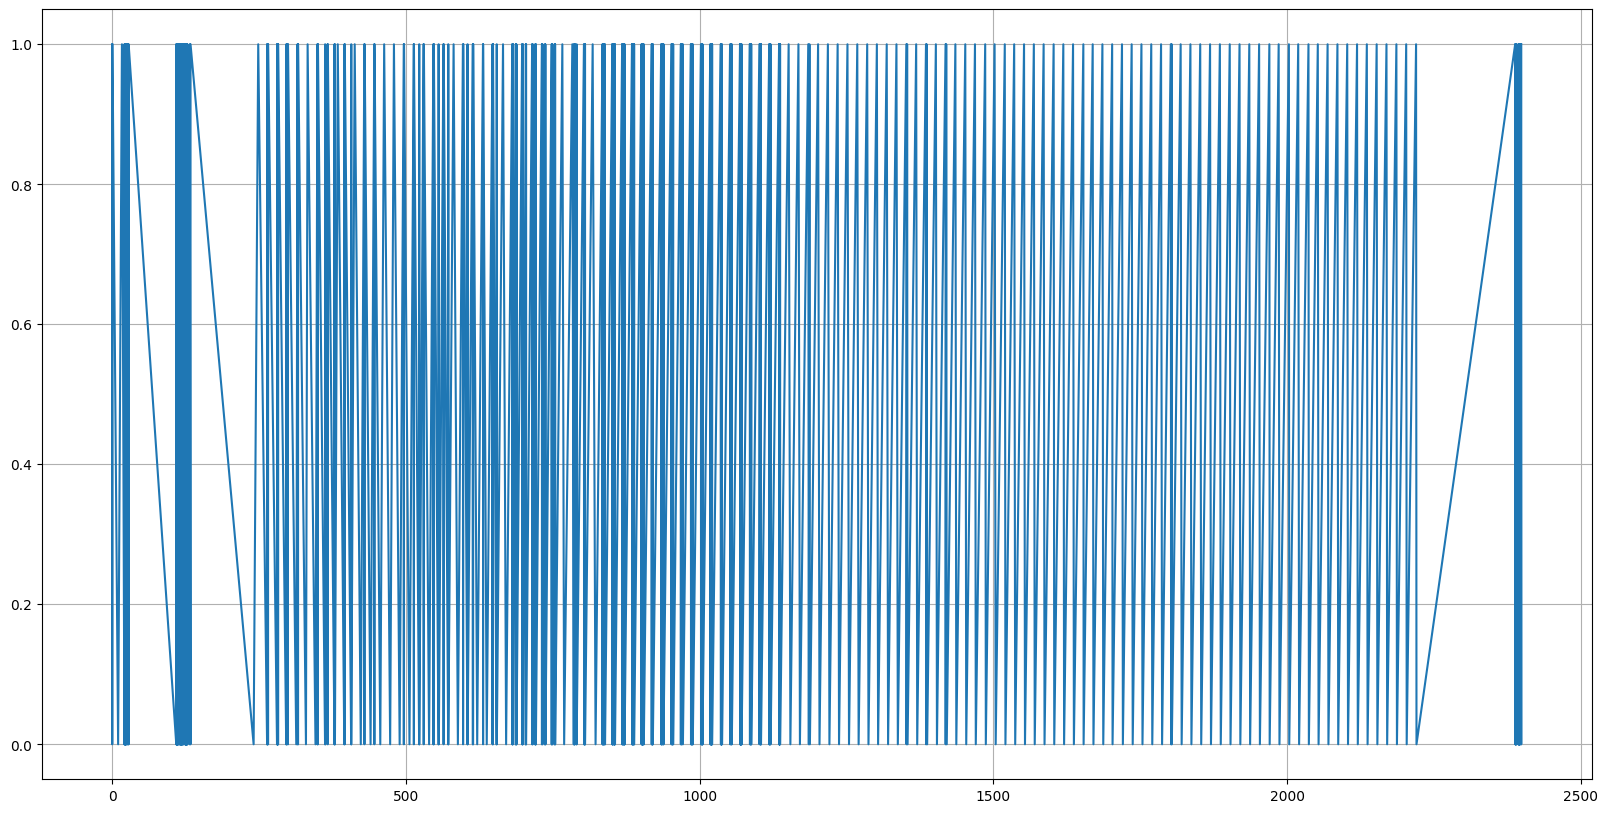

In [29]:
plt.figure(figsize=(20, 10))
# plt.plot(absolute_times_1, bit_values_1, label='1', color='red')
# plt.plot(absolute_times_2, bit_values_2, label='2', color='blue')
# plt.plot(absolute_times_3, bit_values_3, label='3', color='green')
# plt.xticks(np.arange(0, absolute_times[-1], 100))
plt.plot(absolute_times, bit_values)
plt.grid()
plt.show()